## Load the Data

In [1]:
# Load the data
data <- read.csv("/content/sample_data/ds_research_data.csv", header = TRUE)

In [2]:
head(data)

,gender,birthyear,Province,news_canada_1,news_canada_2,news_canada_3,news_canada_4,news_canada_6,news_canada_7,news_canada_8,⋯,Q96_15,Q96_16,Q96_17,Q96_17_TEXT,Q100,Q100_6_TEXT,Q117.1,Q102,Q110,Q112
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,What is your gender?,Please enter the year you were born:,Province,Which of the following sources of information do you know? - CTV News,Which of the following sources of information do you know? - The CBC,Which of the following sources of information do you know? - The Hill Times,Which of the following sources of information do you know? - MacLeans,Which of the following sources of information do you know? - The Canadian Public Affairs Channel,Which of the following sources of information do you know? - The Globe and Mail,Which of the following sources of information do you know? - The National Post,⋯,"In addition to being Canadian, what is your main ancestry or ethnic group, that is, from which global region did you or your ancestors come from? - Selected Choice - Pacific Islands","In addition to being Canadian, what is your main ancestry or ethnic group, that is, from which global region did you or your ancestors come from? - Selected Choice - I don’t know","In addition to being Canadian, what is your main ancestry or ethnic group, that is, from which global region did you or your ancestors come from? - Selected Choice - Other:","In addition to being Canadian, what is your main ancestry or ethnic group, that is, from which global region did you or your ancestors come from? - Other: - Text",What is your mother tongue? - Selected Choice,What is your mother tongue? - Other: - Text,What best describes your financial situation?,What is your civil status?,"Who did you vote for in the last federal election? If you cannot remember or did not vote, please indicate so.",Who did you vote for in the 2018 Ontario general election?
2,"{""ImportId"":""QID4""}","{""ImportId"":""QID5_TEXT""}","{""ImportId"":""Province""}","{""ImportId"":""QID67"",""choiceId"":""1""}","{""ImportId"":""QID67"",""choiceId"":""2""}","{""ImportId"":""QID67"",""choiceId"":""3""}","{""ImportId"":""QID67"",""choiceId"":""4""}","{""ImportId"":""QID67"",""choiceId"":""6""}","{""ImportId"":""QID67"",""choiceId"":""7""}","{""ImportId"":""QID67"",""choiceId"":""8""}",⋯,"{""ImportId"":""QID114"",""choiceId"":""15""}","{""ImportId"":""QID114"",""choiceId"":""16""}","{""ImportId"":""QID114"",""choiceId"":""17""}","{""ImportId"":""QID114_17_TEXT""}","{""ImportId"":""QID116""}","{""ImportId"":""QID116_6_TEXT""}","{""ImportId"":""QID126""}","{""ImportId"":""QID117""}","{""ImportId"":""QID121""}","{""ImportId"":""QID122""}"
3,Male,1986,Ontario,,,0,,0,,0,⋯,0,0,0,-99,English,-99,Getting ahead with some savings,Married,Liberal Party led by Justin Trudeau,The Progressive Conservative Party led by Doug Ford
4,Male,1978,Ontario,,,0,0,0,,,⋯,0,0,0,-99,English,-99,Just getting by,Common-law,Conservative Party led by Andrew Scheer,The Progressive Conservative Party led by Doug Ford
5,Female,1999,Ontario,CTV News,,,MacLeans,,,0,⋯,0,0,0,-99,English,-99,Getting ahead with some savings,Single,NDP led by Jagmeet Singh,I did not vote
6,Male,1983,BC,0,0,,,0,,The National Post,⋯,0,0,0,-99,English,-99,Getting ahead with some savings,Divorced,I don’t remember,


In [3]:
dim(data)

[1] 1590  129

In [4]:
# Convert all column names to lowercase
colnames(data) <- tolower(colnames(data))

# Display the updated column names to confirm the change
colnames(data)

[1] "gender"         "birthyear"      "province"       "news_canada_1" 
  [5] "news_canada_2"  "news_canada_3"  "news_canada_4"  "news_canada_6" 
  [9] "news_canada_7"  "news_canada_8"  "news_canada_9"  "news_canada_10"
 [13] "news_canada_11" "news_canada_12" "news_canada_13" "news_canada_14"
 [17] "news_canada_15" "news_canada_16" "news_canada_17" "news_canada_18"
 [21] "news_canada_19" "news_canada_20" "news_canada_21" "news_canada_22"
 [25] "news_canada_23" "news_canada_24" "news_canada_25" "news_canada_26"
 [29] "news_canada_27" "news_canada_28" "news_canada_29" "news_trust_1"  
 [33] "news_trust_2"   "news_trust_3"   "news_trust_4"   "news_trust_5"  
 [37] "news_trust_6"   "news_trust_7"   "news_trust_8"   "news_trust_9"  
 [41] "news_trust_10"  "news_trust_11"  "news_trust_12"  "news_trust_13" 
 [45] "news_trust_14"  "news_trust_15"  "news_trust_16"  "news_trust_17" 
 [49] "news_trust_18"  "news_trust_19"  "news_trust_20"  "news_trust_21" 
 [53] "news_trust_22"  "news_trust_23"  "news_trust_24"  "news_trust_25" 
 [57] "news_trust_26"  "news_trust_27"  "news_trust_28"  "q118_1"        
 [61] "q118_2"         "q118_3"         "q118_4"         "q118_5"        
 [65] "q118_6"         "q118_7"         "q118_8"         "q118_9"        
 [69] "q118_10"        "q118_11"        "q118_12"        "q118_13"       
 [73] "q118_14"        "q118_15"        "q118_16"        "q118_17"       
 [77] "q118_18"        "q118_19"        "q118_20"        "q118_21"       
 [81] "q118_22"        "q118_23"        "q118_24"        "q118_25"       
 [85] "q118_26"        "q118_27"        "q118_28"        "whenready_1"   
 [89] "whenready_2"    "whenready_3"    "whenready_4"    "whenready_5"   
 [93] "whenready_6"    "whenready_7"    "whenready_8"    "whenready_9"   
 [97] "whenready_10"   "q113"           "q92"            "q90"           
[101] "q108"           "q108_7_text"    "q104"           "q104_19_text"  
[105] "q104_20_text"   "q88"            "q98"            "q96_1"         
[109] "q96_4"          "q96_5"          "q96_6"          "q96_7"         
[113] "q96_8"          "q96_9"          "q96_10"         "q96_11"        
[117] "q96_12"         "q96_13"         "q96_14"         "q96_15"        
[121] "q96_16"         "q96_17"         "q96_17_text"    "q100"          
[125] "q100_6_text"    "q117.1"         "q102"           "q110"          
[129] "q112"

# Test 1: Demographics

## Exploratory Data Analysis

In [5]:
# Check the structure of the relevant columns: province, gender, birthyear
str(data[, c("province", "gender", "birthyear")])

'data.frame':	1590 obs. of  3 variables:
 $ province : chr  "Province" "{\"ImportId\":\"Province\"}" "Ontario" "Ontario" ...
 $ gender   : chr  "What is your gender?" "{\"ImportId\":\"QID4\"}" "Male" "Male" ...
 $ birthyear: chr  "Please enter the year you were born:" "{\"ImportId\":\"QID5_TEXT\"}" "1986" "1978" ...


Data Cleaning

the columns are stored as character strings.
It looks like the first row of the dataset might be headers or metadata, not actual data values. To clean this up I will remove data rows and convert data types.

In [6]:
# Remove the first two rows that contain metadata
data <- data[-c(1, 2), ]

# Reset row names after removing rows
rownames(data) <- NULL


In [7]:
# Convert the 'birthyear' column to numeric
data$birthyear <- as.numeric(data$birthyear)

In [8]:
# Check the structure of the relevant columns again
str(data[, c("province", "gender", "birthyear")])

'data.frame':	1588 obs. of  3 variables:
 $ province : chr  "Ontario" "Ontario" "Ontario" "BC" ...
 $ gender   : chr  "Male" "Male" "Female" "Male" ...
 $ birthyear: num  1986 1978 1999 1983 1986 ...


checking for missing values

In [9]:
# Check for missing values in each column
num_missing_province <- sum(is.na(data$province))
num_missing_gender <- sum(is.na(data$gender))
num_missing_birthyear <- sum(is.na(data$birthyear))

In [10]:
# Print the number of missing values for each column
cat("Number of missing values in 'province':", num_missing_province, "\n")
cat("Number of missing values in 'gender':", num_missing_gender, "\n")
cat("Number of missing values in 'birthyear':", num_missing_birthyear, "\n")

Number of missing values in 'province': 0 
Number of missing values in 'gender': 0 
Number of missing values in 'birthyear': 0 


Summary Statistics

In [11]:
# Summary statistics for 'province' column
province_summary <- table(data$province)
print(province_summary)


     Alberta           BC     Manitoba NewBrunswick Newfoundland   NovaScotia 
         179          219           57           34           22           44 
     Ontario          PEI       Quebec Saskatchewan  Territories 
         610            7          364           49            3 


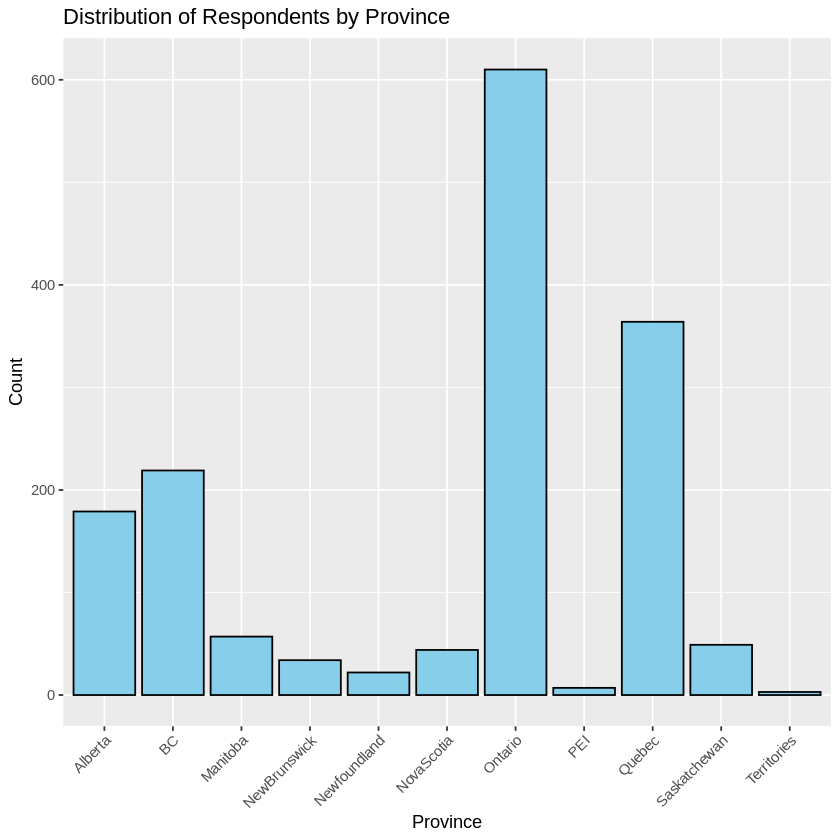

In [12]:
# Plot distribution of province
library(ggplot2)
ggplot(data, aes(x = province)) +
  geom_bar(fill = "skyblue", color = "black") +
  labs(title = "Distribution of Respondents by Province", x = "Province", y = "Count") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [13]:
# Summary statistics for 'gender' column
gender_summary <- table(data$gender)
print(gender_summary)


             Female I prefer not to say                Male               Other 
                848                   3                 735                   2 


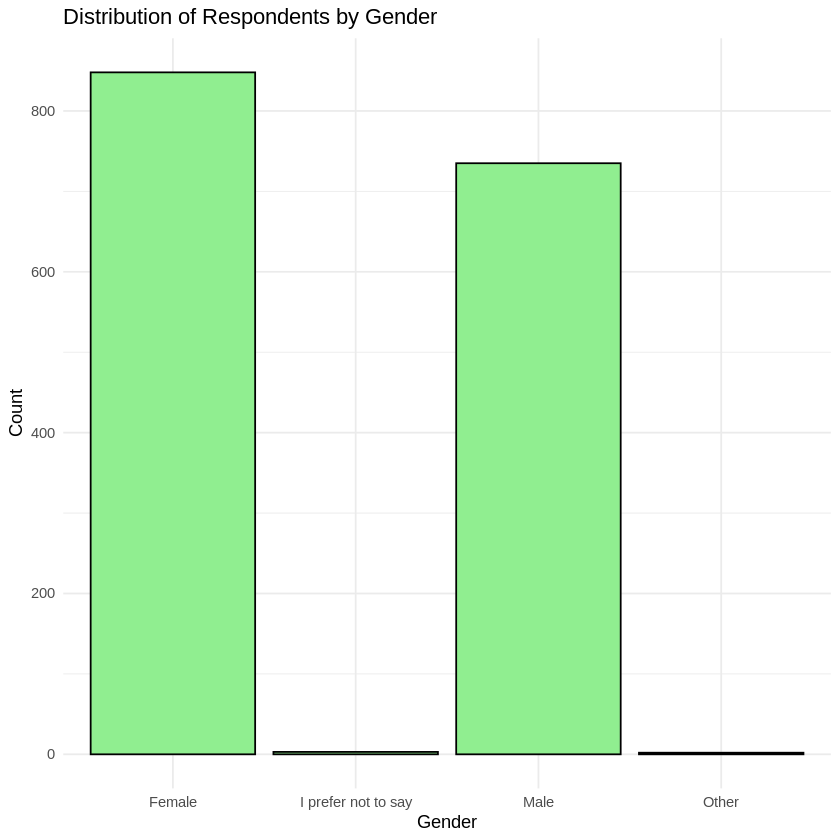

In [14]:
# Plot distribution of gender
ggplot(data, aes(x = gender)) +
  geom_bar(fill = "lightgreen", color = "black") +
  labs(title = "Distribution of Respondents by Gender", x = "Gender", y = "Count") +
  theme_minimal()

In [15]:
# Summary statistics for 'birthyear' column
birthyear_summary <- summary(data$birthyear)
print(birthyear_summary)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1932    1956    1970    1970    1984    2002 


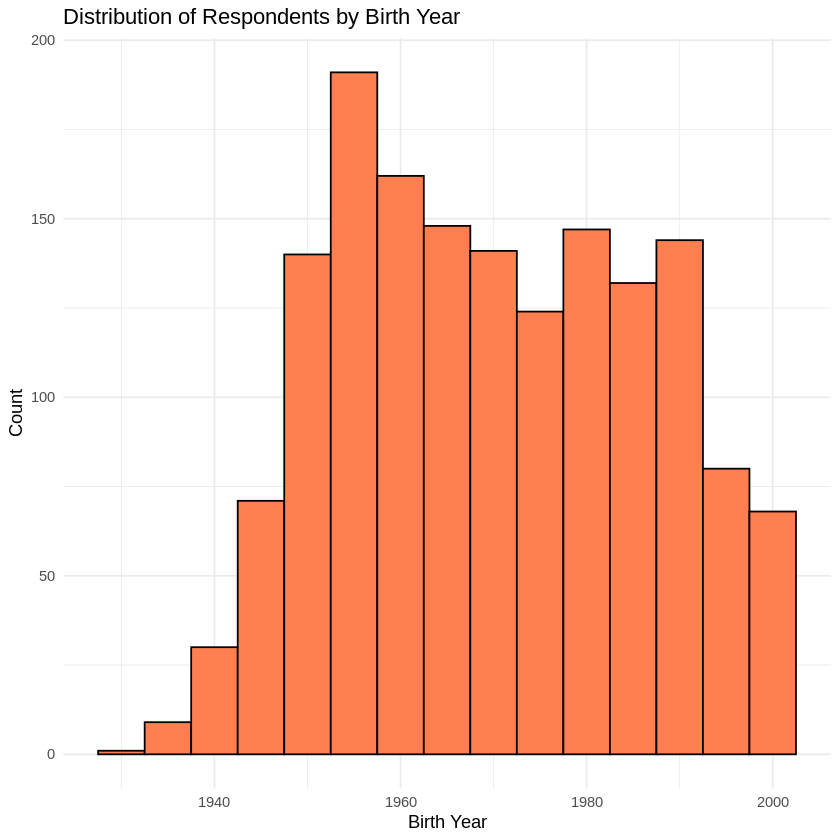

In [16]:
# Plot distribution of birth year
ggplot(data, aes(x = birthyear)) +
  geom_histogram(binwidth = 5, fill = "coral", color = "black") +
  labs(title = "Distribution of Respondents by Birth Year", x = "Birth Year", y = "Count") +
  theme_minimal()

## Replicating the Graph

**gender distribution across different Canadian provinces**

In [30]:
# Load necessary libraries
library(ggplot2)
library(dplyr)
library(tidyr)

In [18]:
# Create a subset of the data for provinces (merge BC and Territories) and gender
# Calculate the proportion of male and female respondents by province

gender_province_filtered <- data %>%
  filter(gender %in% c("Male", "Female")) %>%
  mutate(province = ifelse(province %in% c("Territories","BC"), "BC and Territories", province)) %>%
  group_by(province, gender) %>%
  summarise(count = n(), .groups = 'drop') %>%
  ungroup() %>%
  group_by(province) %>%
  mutate(prop = count / sum(count) * 100) %>%
  ungroup()

In [19]:
# Adding a full sample row
full_sample <- gender_province_filtered %>%
  group_by(gender) %>%
  summarise(count = sum(count), .groups = 'drop') %>%
  mutate(province = "Full sample", prop = ceiling(count / sum(count) * 100))

In [20]:
full_sample

gender,count,province,prop
<chr>,<int>,<chr>,<dbl>
Female,848,Full sample,54
Male,735,Full sample,47


In [21]:
# Combine the full sample with the original data
gender_province_combined <- bind_rows(full_sample, gender_province_filtered)

In [22]:
gender_province_combined

gender,count,province,prop
<chr>,<int>,<chr>,<dbl>
Female,848,Full sample,54.00000
Male,735,Full sample,47.00000
Female,91,Alberta,50.83799
Male,88,Alberta,49.16201
Female,113,BC and Territories,50.90090
Male,109,BC and Territories,49.09910
Female,28,Manitoba,49.12281
Male,29,Manitoba,50.87719
Female,20,NewBrunswick,60.60606


In [23]:
# Reshape the dataframe: pivot wider to have Male and Female as columns
gender_province_wide <- gender_province_combined %>%
  select(province, gender, prop) %>%  # Select only the necessary columns
  pivot_wider(names_from = gender, values_from = prop) %>%  # Pivot wider to spread 'gender' into columns
  arrange(province)  # Arrange by province for readability

In [24]:
#sort it
gender_province_wide_sorted <- gender_province_wide %>%
  arrange(province)

In [25]:
gender_province_wide_sorted

province,Female,Male
<chr>,<dbl>,<dbl>
Alberta,50.83799,49.16201
BC and Territories,50.90090,49.09910
Full sample,54.00000,47.00000
Manitoba,49.12281,50.87719
NewBrunswick,60.60606,39.39394
Newfoundland,36.36364,63.63636
NovaScotia,56.81818,43.18182
Ontario,55.18946,44.81054
PEI,57.14286,42.85714


In [26]:
gender_province_combined$province <- factor(gender_province_combined$province,
                                            levels = rev(unique(gender_province_combined$province)))

In [27]:
gender_province_combined

gender,count,province,prop
<chr>,<int>,<fct>,<dbl>
Female,848,Full sample,54.00000
Male,735,Full sample,47.00000
Female,91,Alberta,50.83799
Male,88,Alberta,49.16201
Female,113,BC and Territories,50.90090
Male,109,BC and Territories,49.09910
Female,28,Manitoba,49.12281
Male,29,Manitoba,50.87719
Female,20,NewBrunswick,60.60606


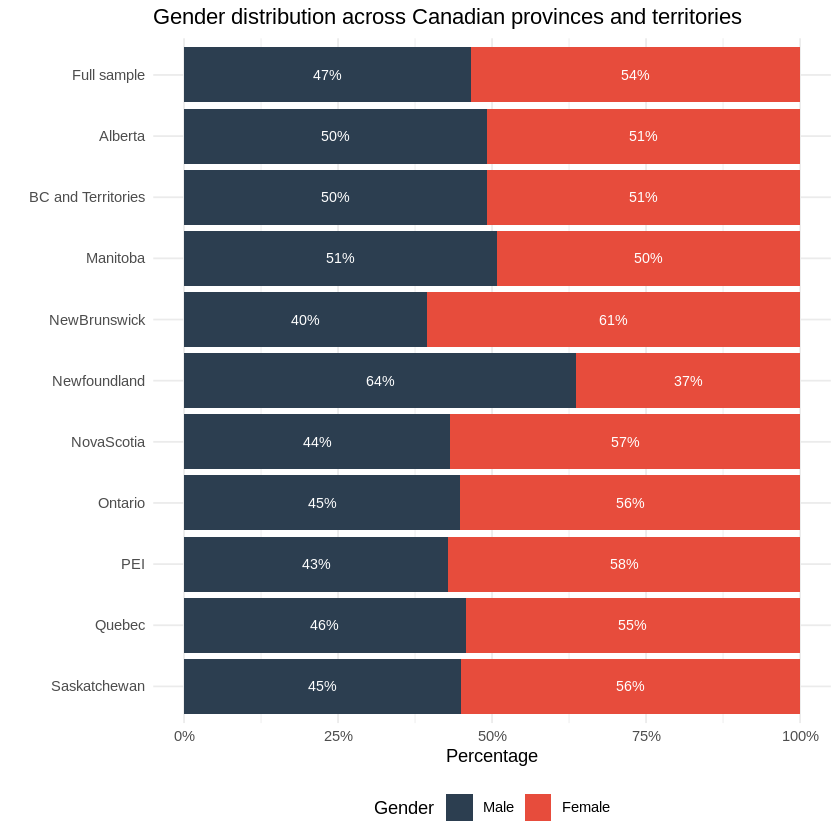

In [28]:
# Plotting the gender distribution across provinces with the reversed order
ggplot(gender_province_combined, aes(x = province, y = prop, fill = gender)) +
  geom_bar(stat = "identity", position = "fill") +
  geom_text(aes(label = paste0(ceiling(prop), "%")),
            position = position_fill(vjust = 0.5),
            color = "white", size = 3) +
  scale_y_continuous(labels = scales::percent_format()) +
  scale_fill_manual(values = c("Male" = "#2c3e50", "Female" = "#e74c3c"),
                    name = "Gender",
                    breaks = c("Male", "Female"),  # Ensures correct order in legend
                    labels = c("Male", "Female")) +  # Correct labels
  coord_flip() +
  labs(title = "Gender distribution across Canadian provinces and territories",
       x = "", y = "Percentage") +
  theme_minimal() +
  theme(legend.position = "bottom")

The gender distribution graph across Canadian provinces and territories highlights that, on average, there is a slight overrepresentation of females compared to males in the "Full sample" (54% female, 46% male). In Ontario and Quebec, the two most populated provinces in Canada, the gender distribution shows a relatively balanced representation. Some provinces, such as Newfoundland, show a higher proportion of male respondents (64% male), while others, like New Brunswick and Nova Scotia, have a noticeable female majority (61% and 57%, respectively). This variation suggests regional differences in gender distribution, which may reflect demographic characteristics, survey participation rates, or other social factors unique to each province.



1.   Are there any differences between these results and what we should expect from
Canadian statistics and if so, how would you try to correct these differences?
2.   The graph shows the distribution of survey respondents but does not account for the actual population size of each province. Without this context, it’s difficult to assess how representative the survey sample is relative to each province's population.

  Adding an additional layer to the analysis, such as a segmented bar chart by age group, or creating a separate age distribution graph alongside this gender distribution could provide a more comprehensive demographic profile.



# Test 2: when_ready

In [77]:
when_ready_data <- data %>%
  select(gender, birthyear, whenready_1, whenready_2, whenready_3, whenready_4, whenready_5,
         whenready_6, whenready_7, whenready_8, whenready_9, whenready_10)

head(when_ready_data)

,gender,birthyear,whenready_1,whenready_2,whenready_3,whenready_4,whenready_5,whenready_6,whenready_7,whenready_8,whenready_9,whenready_10
,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Male,1986,In more than 6 months,When a vaccine will be ready or the virus will have disappeared,In more than 6 months,When a vaccine will be ready or the virus will have disappeared,I am already ready or doing it,In 3-6 months,I am already ready or doing it,I am already ready or doing it,In more than 6 months,I am already ready or doing it
2,Male,1978,In 1-3 months,In more than 6 months,In more than 6 months,In 3-6 months,In 3-6 months,In more than 6 months,In 3-6 months,In more than 6 months,In 3-6 months,In 3-6 months
3,Female,1999,I don’t foresee a time when I will be ready to do it again,I don’t foresee a time when I will be ready to do it again,When a vaccine will be ready or the virus will have disappeared,I don’t foresee a time when I will be ready to do it again,When a vaccine will be ready or the virus will have disappeared,I am already ready or doing it,When a vaccine will be ready or the virus will have disappeared,When a vaccine will be ready or the virus will have disappeared,When a vaccine will be ready or the virus will have disappeared,I am already ready or doing it
4,Male,1983,I don’t foresee a time when I will be ready to do it again,I don’t foresee a time when I will be ready to do it again,I don’t foresee a time when I will be ready to do it again,I don’t foresee a time when I will be ready to do it again,I don’t foresee a time when I will be ready to do it again,I don’t foresee a time when I will be ready to do it again,I don’t foresee a time when I will be ready to do it again,I don’t foresee a time when I will be ready to do it again,I don’t foresee a time when I will be ready to do it again,I don’t foresee a time when I will be ready to do it again
5,Male,1986,In 3-6 months,I don’t foresee a time when I will be ready to do it again,In 3-6 months,I don’t foresee a time when I will be ready to do it again,In 3-6 months,In more than 6 months,In 1-3 months,I don’t foresee a time when I will be ready to do it again,I don’t foresee a time when I will be ready to do it again,I don’t foresee a time when I will be ready to do it again
6,Female,1978,When a vaccine will be ready or the virus will have disappeared,When a vaccine will be ready or the virus will have disappeared,When a vaccine will be ready or the virus will have disappeared,When a vaccine will be ready or the virus will have disappeared,In more than 6 months,In 3-6 months,In 3-6 months,In more than 6 months,When a vaccine will be ready or the virus will have disappeared,In 3-6 months


In [78]:
str(when_ready_data)

'data.frame':	1588 obs. of  12 variables:
 $ gender      : chr  "Male" "Male" "Female" "Male" ...
 $ birthyear   : num  1986 1978 1999 1983 1986 ...
 $ whenready_1 : chr  "\t\tIn more than 6 months" "\t\tIn 1-3 months" "\t\tI don’t foresee a time when I will be ready to do it again" "\t\tI don’t foresee a time when I will be ready to do it again" ...
 $ whenready_2 : chr  "\t\tWhen a vaccine will be ready or the virus will have disappeared" "\t\tIn more than 6 months" "\t\tI don’t foresee a time when I will be ready to do it again" "\t\tI don’t foresee a time when I will be ready to do it again" ...
 $ whenready_3 : chr  "\t\tIn more than 6 months" "\t\tIn more than 6 months" "\t\tWhen a vaccine will be ready or the virus will have disappeared" "\t\tI don’t foresee a time when I will be ready to do it again" ...
 $ whenready_4 : chr  "\t\tWhen a vaccine will be ready or the virus will have disappeared" "\t\tIn 3-6 months" "\t\tI don’t foresee a time when I will be ready to do it again"

In [79]:
summary(when_ready_data)

    gender            birthyear    whenready_1        whenready_2       
 Length:1588        Min.   :1932   Length:1588        Length:1588       
 Class :character   1st Qu.:1956   Class :character   Class :character  
 Mode  :character   Median :1970   Mode  :character   Mode  :character  
                    Mean   :1970                                        
                    3rd Qu.:1984                                        
                    Max.   :2002                                        
 whenready_3        whenready_4        whenready_5        whenready_6       
 Length:1588        Length:1588        Length:1588        Length:1588       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                           

Creating Age Groups

In [80]:
when_ready_data <- when_ready_data %>%
  mutate(age = 2024 - birthyear,  # Assuming current year is 2024
         age_group = case_when(
           age >= 18 & age <= 34 ~ "18-34 years",
           age >= 35 & age <= 49 ~ "35-49 years",
           age >= 50 & age <= 64 ~ "50-64 years",
           age >= 65 ~ "65+ years",
           TRUE ~ "Unknown"  # Handles missing or incorrect values
         ))

In [81]:
# Display the first few rows to check the age groups
head(when_ready_data)

,gender,birthyear,whenready_1,whenready_2,whenready_3,whenready_4,whenready_5,whenready_6,whenready_7,whenready_8,whenready_9,whenready_10,age,age_group
,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
1,Male,1986,In more than 6 months,When a vaccine will be ready or the virus will have disappeared,In more than 6 months,When a vaccine will be ready or the virus will have disappeared,I am already ready or doing it,In 3-6 months,I am already ready or doing it,I am already ready or doing it,In more than 6 months,I am already ready or doing it,38,35-49 years
2,Male,1978,In 1-3 months,In more than 6 months,In more than 6 months,In 3-6 months,In 3-6 months,In more than 6 months,In 3-6 months,In more than 6 months,In 3-6 months,In 3-6 months,46,35-49 years
3,Female,1999,I don’t foresee a time when I will be ready to do it again,I don’t foresee a time when I will be ready to do it again,When a vaccine will be ready or the virus will have disappeared,I don’t foresee a time when I will be ready to do it again,When a vaccine will be ready or the virus will have disappeared,I am already ready or doing it,When a vaccine will be ready or the virus will have disappeared,When a vaccine will be ready or the virus will have disappeared,When a vaccine will be ready or the virus will have disappeared,I am already ready or doing it,25,18-34 years
4,Male,1983,I don’t foresee a time when I will be ready to do it again,I don’t foresee a time when I will be ready to do it again,I don’t foresee a time when I will be ready to do it again,I don’t foresee a time when I will be ready to do it again,I don’t foresee a time when I will be ready to do it again,I don’t foresee a time when I will be ready to do it again,I don’t foresee a time when I will be ready to do it again,I don’t foresee a time when I will be ready to do it again,I don’t foresee a time when I will be ready to do it again,I don’t foresee a time when I will be ready to do it again,41,35-49 years
5,Male,1986,In 3-6 months,I don’t foresee a time when I will be ready to do it again,In 3-6 months,I don’t foresee a time when I will be ready to do it again,In 3-6 months,In more than 6 months,In 1-3 months,I don’t foresee a time when I will be ready to do it again,I don’t foresee a time when I will be ready to do it again,I don’t foresee a time when I will be ready to do it again,38,35-49 years
6,Female,1978,When a vaccine will be ready or the virus will have disappeared,When a vaccine will be ready or the virus will have disappeared,When a vaccine will be ready or the virus will have disappeared,When a vaccine will be ready or the virus will have disappeared,In more than 6 months,In 3-6 months,In 3-6 months,In more than 6 months,When a vaccine will be ready or the virus will have disappeared,In 3-6 months,46,35-49 years


In [82]:
when_ready_data %>%
  filter(is.na(age_group) | age_group == "Unknown")

gender,birthyear,whenready_1,whenready_2,whenready_3,whenready_4,whenready_5,whenready_6,whenready_7,whenready_8,whenready_9,whenready_10,age,age_group
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>


Reshape Data

In [85]:
#Add a unique ID for each respondent
when_ready_data <- when_ready_data %>%
  mutate(ID = row_number())

In [86]:
head(when_ready_data)

,gender,birthyear,whenready_1,whenready_2,whenready_3,whenready_4,whenready_5,whenready_6,whenready_7,whenready_8,whenready_9,whenready_10,age,age_group,ID
,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<int>
1,Male,1986,In more than 6 months,When a vaccine will be ready or the virus will have disappeared,In more than 6 months,When a vaccine will be ready or the virus will have disappeared,I am already ready or doing it,In 3-6 months,I am already ready or doing it,I am already ready or doing it,In more than 6 months,I am already ready or doing it,38,35-49 years,1
2,Male,1978,In 1-3 months,In more than 6 months,In more than 6 months,In 3-6 months,In 3-6 months,In more than 6 months,In 3-6 months,In more than 6 months,In 3-6 months,In 3-6 months,46,35-49 years,2
3,Female,1999,I don’t foresee a time when I will be ready to do it again,I don’t foresee a time when I will be ready to do it again,When a vaccine will be ready or the virus will have disappeared,I don’t foresee a time when I will be ready to do it again,When a vaccine will be ready or the virus will have disappeared,I am already ready or doing it,When a vaccine will be ready or the virus will have disappeared,When a vaccine will be ready or the virus will have disappeared,When a vaccine will be ready or the virus will have disappeared,I am already ready or doing it,25,18-34 years,3
4,Male,1983,I don’t foresee a time when I will be ready to do it again,I don’t foresee a time when I will be ready to do it again,I don’t foresee a time when I will be ready to do it again,I don’t foresee a time when I will be ready to do it again,I don’t foresee a time when I will be ready to do it again,I don’t foresee a time when I will be ready to do it again,I don’t foresee a time when I will be ready to do it again,I don’t foresee a time when I will be ready to do it again,I don’t foresee a time when I will be ready to do it again,I don’t foresee a time when I will be ready to do it again,41,35-49 years,4
5,Male,1986,In 3-6 months,I don’t foresee a time when I will be ready to do it again,In 3-6 months,I don’t foresee a time when I will be ready to do it again,In 3-6 months,In more than 6 months,In 1-3 months,I don’t foresee a time when I will be ready to do it again,I don’t foresee a time when I will be ready to do it again,I don’t foresee a time when I will be ready to do it again,38,35-49 years,5
6,Female,1978,When a vaccine will be ready or the virus will have disappeared,When a vaccine will be ready or the virus will have disappeared,When a vaccine will be ready or the virus will have disappeared,When a vaccine will be ready or the virus will have disappeared,In more than 6 months,In 3-6 months,In 3-6 months,In more than 6 months,When a vaccine will be ready or the virus will have disappeared,In 3-6 months,46,35-49 years,6


In [94]:
when_ready_long <- when_ready_data %>%
  pivot_longer(
    cols = starts_with("whenready_"),
    names_to = "behavior",
    values_to = "readiness"
  )

In [95]:
head(when_ready_long)

gender,birthyear,age,age_group,ID,behavior,readiness
<chr>,<dbl>,<dbl>,<chr>,<int>,<chr>,<chr>
Male,1986,38,35-49 years,1,whenready_1,In more than 6 months
Male,1986,38,35-49 years,1,whenready_2,When a vaccine will be ready or the virus will have disappeared
Male,1986,38,35-49 years,1,whenready_3,In more than 6 months
Male,1986,38,35-49 years,1,whenready_4,When a vaccine will be ready or the virus will have disappeared
Male,1986,38,35-49 years,1,whenready_5,I am already ready or doing it
Male,1986,38,35-49 years,1,whenready_6,In 3-6 months


In [96]:
str(when_ready_long)

tibble [15,880 × 7] (S3: tbl_df/tbl/data.frame)
 $ gender   : chr [1:15880] "Male" "Male" "Male" "Male" ...
 $ birthyear: num [1:15880] 1986 1986 1986 1986 1986 ...
 $ age      : num [1:15880] 38 38 38 38 38 38 38 38 38 38 ...
 $ age_group: chr [1:15880] "35-49 years" "35-49 years" "35-49 years" "35-49 years" ...
 $ ID       : int [1:15880] 1 1 1 1 1 1 1 1 1 1 ...
 $ behavior : chr [1:15880] "whenready_1" "whenready_2" "whenready_3" "whenready_4" ...
 $ readiness: chr [1:15880] "\t\tIn more than 6 months" "\t\tWhen a vaccine will be ready or the virus will have disappeared" "\t\tIn more than 6 months" "\t\tWhen a vaccine will be ready or the virus will have disappeared" ...


In [98]:
# Reorder columns to ensure 'ID' comes before 'behavior'
when_ready_long <- when_ready_long %>%
  select(ID, birthyear, age, age_group, behavior, readiness)

In [99]:
head(when_ready_long)

ID,birthyear,age,age_group,behavior,readiness
<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,1986,38,35-49 years,whenready_1,In more than 6 months
1,1986,38,35-49 years,whenready_2,When a vaccine will be ready or the virus will have disappeared
1,1986,38,35-49 years,whenready_3,In more than 6 months
1,1986,38,35-49 years,whenready_4,When a vaccine will be ready or the virus will have disappeared
1,1986,38,35-49 years,whenready_5,I am already ready or doing it
1,1986,38,35-49 years,whenready_6,In 3-6 months


Convert Responses to Numeric Values

In [100]:
unique(when_ready_long$readiness)

[1] "\t\tIn more than 6 months"                                          
[2] "\t\tWhen a vaccine will be ready or the virus will have disappeared"
[3] "I am already ready or doing it "                                    
[4] "\t\tIn 3-6 months"                                                  
[5] "\t\tIn 1-3 months"                                                  
[6] "\t\tI don’t foresee a time when I will be ready to do it again"     
[7] "Not applicable for me"                                              
[8] ""

In [101]:
#Standardize the responses by trimming whitespace
when_ready_long <- when_ready_long %>%
  mutate(readiness = trimws(readiness))

In [102]:
#Replace emoty space/ NA values in 'readiness' with "Not applicable for me"
when_ready_long <- when_ready_long %>%
  mutate(readiness = ifelse(readiness == "" | is.na(readiness), "Not applicable for me", readiness))

In [103]:
# Convert the responses to numeric values
when_ready_long <- when_ready_long %>%
  mutate(readiness_numeric = case_when(
    readiness == "I am already ready or doing it" ~ 5,
    readiness == "In 1-3 months" ~ 4,
    readiness == "In 3-6 months" ~ 3,
    readiness == "In more than 6 months" ~ 2,
    readiness == "When a vaccine will be ready or the virus will have disappeared" ~ 1,
    readiness == "I don’t foresee a time when I will be ready to do it again" ~ 0,
    readiness == "Not applicable for me" ~ -1,
    TRUE ~ NA_real_  # Handles any unexpected values
  ))

In [104]:
head(when_ready_long)

ID,birthyear,age,age_group,behavior,readiness,readiness_numeric
<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
1,1986,38,35-49 years,whenready_1,In more than 6 months,2
1,1986,38,35-49 years,whenready_2,When a vaccine will be ready or the virus will have disappeared,1
1,1986,38,35-49 years,whenready_3,In more than 6 months,2
1,1986,38,35-49 years,whenready_4,When a vaccine will be ready or the virus will have disappeared,1
1,1986,38,35-49 years,whenready_5,I am already ready or doing it,5
1,1986,38,35-49 years,whenready_6,In 3-6 months,3


In [75]:
unique(when_ready_long$readiness_numeric)

[1]  2  1  5  3  4  0 -1

### Stacked bar chart

distribution of readiness levels for each behavior across different age groups

In [111]:
options(repr.plot.width = 12, repr.plot.height = 8)

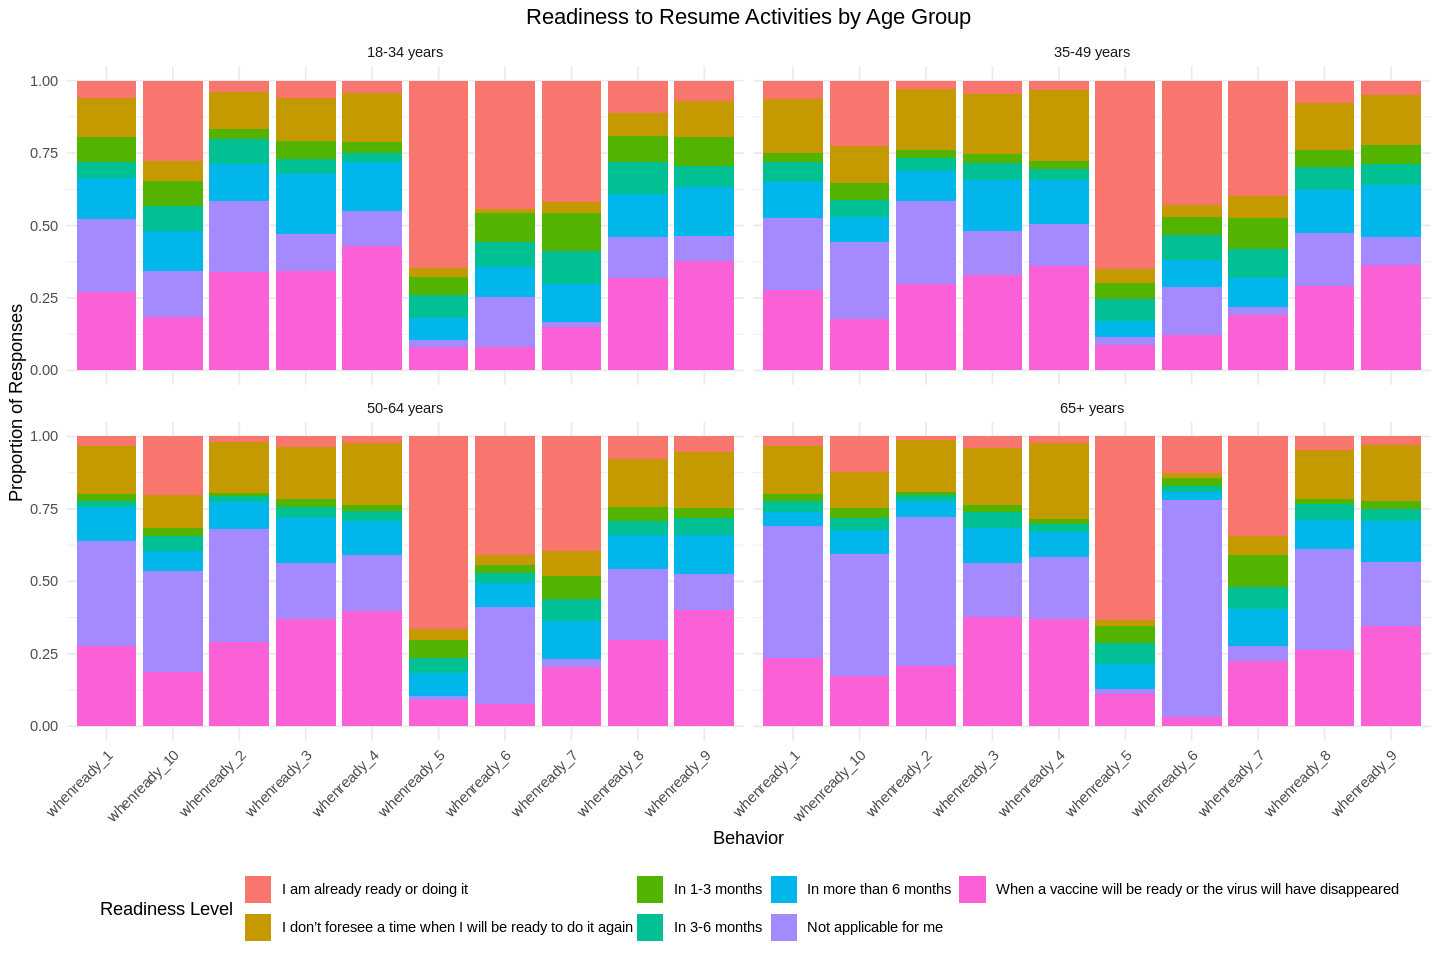

In [112]:
# Stacked bar chart showing readiness across different behaviors and age groups
ggplot(when_ready_long, aes(x = behavior, fill = readiness)) +
  geom_bar(position = "fill") +
  facet_wrap(~ age_group) +
  labs(title = "Readiness to Resume Activities by Age Group",
       x = "Behavior",
       y = "Proportion of Responses",
       fill = "Readiness Level") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        legend.position = "bottom",
        plot.title = element_text(hjust = 0.5))

## Behavior Descriptions

| Behavior Code | Description |
|---------------|-------------|
| `whenready_1` | Travel domestically by plane for business or essential purposes |
| `whenready_2` | Travel internationally by plane for business or essential purposes |
| `whenready_3` | Travel domestically by plane for leisure |
| `whenready_4` | Travel internationally by plane for leisure |
| `whenready_5` | Go shopping in-person at stores or malls |
| `whenready_6` | Return to the workplace |
| `whenready_7` | Go eat in restaurants |
| `whenready_8` | Go to bars, clubs, or crowded spaces |
| `whenready_9` | Attend large public events like a festival or outdoor gathering |
| `whenready_10`| Take public transit |


In [113]:
# Save the plot
ggsave("readiness_by_age_group.png", width = 12, height = 8, dpi = 300)


The stacked bar chart provides a detailed look at readiness levels for various activities across different age groups. Older age groups (50-64 and 65+ years) have a higher proportion of responses in categories like "I don’t foresee a time when I will be ready to do it again" (represented in pink) and "When a vaccine will be ready or the virus will have disappeared" (light blue), especially for high-risk activities such as international travel and attending large public events. In contrast, younger age groups (18-34 and 35-49 years) show more responses indicating they are already ready or will be ready within 1-6 months for various activities, demonstrating less concern or greater willingness to resume normal activities.

## Heatmap

Heatmap of Average Readiness Scores

---


how different age groups feel about resuming various activities. The color intensity represents the average readiness score

In [117]:
#Calculate average readiness score for each behavior and age group
average_readiness <- when_ready_long %>%
  group_by(age_group, behavior) %>%
  summarize(avg_score = round(mean(readiness_numeric, na.rm = TRUE), 2), .groups = "drop")

In [118]:
head(average_readiness)

age_group,behavior,avg_score
<chr>,<chr>,<dbl>
18-34 years,whenready_1,1.12
18-34 years,whenready_10,2.28
18-34 years,whenready_2,0.94
18-34 years,whenready_3,1.35
18-34 years,whenready_4,1.11
18-34 years,whenready_5,3.94


In [123]:
# create heatmap of average readiness scores
heatmap_plot <- ggplot(average_readiness, aes(x = behavior, y = age_group, fill = avg_score)) +
  geom_tile(color = "white") +
  scale_fill_gradient(low = "yellow", high = "red", name = "Avg Readiness Score") +
  labs(
    title = "Average Readiness to Resume Activities by Age Group",
    x = "Behavior",
    y = "Age Group"
  ) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size = 10),  # Rotate x-axis labels
    axis.text.y = element_text(size = 12),                         # Increase y-axis text size
    plot.title = element_text(size = 16, hjust = 0.5),             # Center and increase title size
    legend.text = element_text(size = 10),                         # Increase legend text size
    legend.title = element_text(size = 12)                         # Increase legend title size
  )

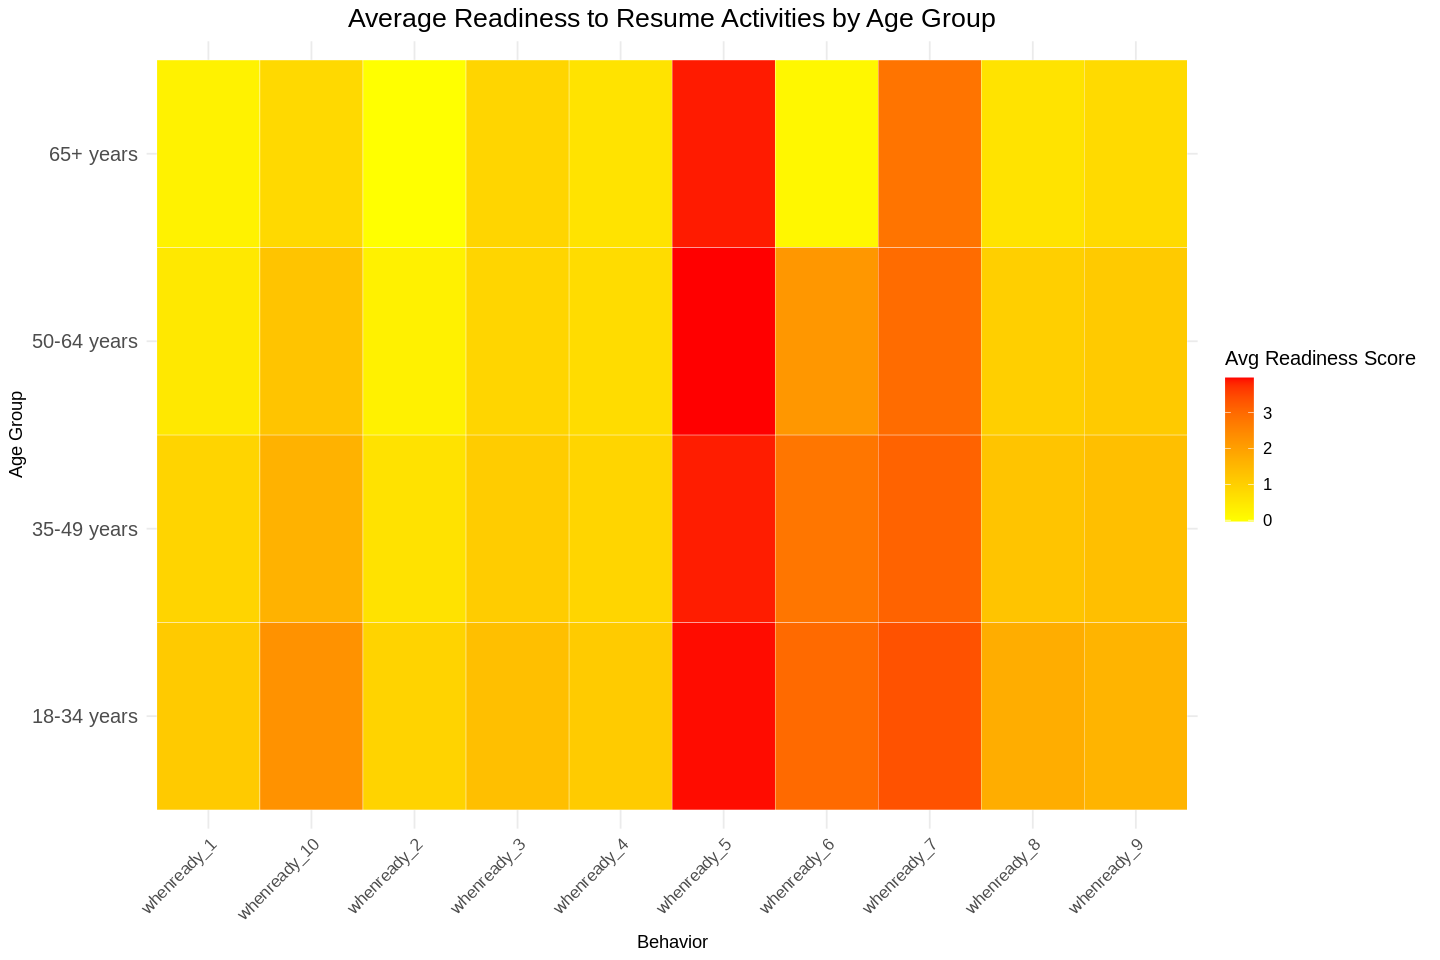

In [124]:
heatmap_plot

## Readiness Level Descriptions

| `readiness_numeric` Value | Readiness Description                                       |
|---------------------------|-------------------------------------------------------------|
| 5                         | I am already ready or doing it                              |
| 4                         | In 1-3 months                                               |
| 3                         | In 3-6 months                                               |
| 2                         | In more than 6 months                                       |
| 1                         | When a vaccine will be ready or the virus will have disappeared |
| 0                         | I don’t foresee a time when I will be ready to do it again  |
| -1                        | Not applicable for me                                       |


In [125]:
ggsave("average_readiness_heatmap.png", plot = heatmap_plot, width = 10, height = 6, dpi = 300)

The heatmap illustrates the average readiness scores for different activities across various age groups. The darkest red color indicates the highest readiness to resume specific activities. Notably, younger age groups (18-34 and 35-49 years) show higher average readiness scores (dark red) for activities like whenready_5 (likely corresponding to "Go shopping in-person at stores or malls") and whenready_6 (which could be "Return to the workplace"), indicating they feel more ready to engage in these activities. In contrast, older age groups (50-64 and 65+ years) show lighter colors across many activities, suggesting a more cautious approach and lower readiness scores. This trend highlights that younger individuals are generally more eager or prepared to return to normal activities, whereas older adults exhibit more hesitation.